# 一、异步IO实现并发爬虫

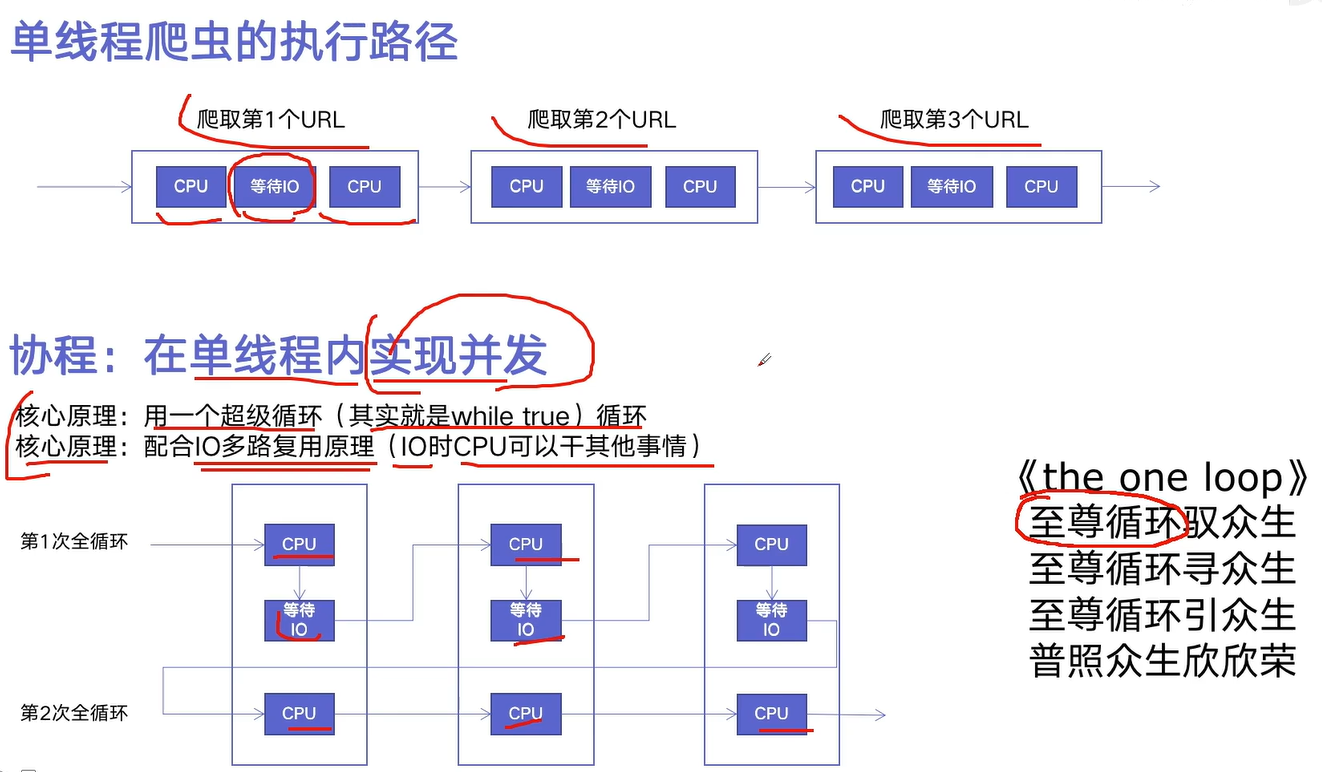

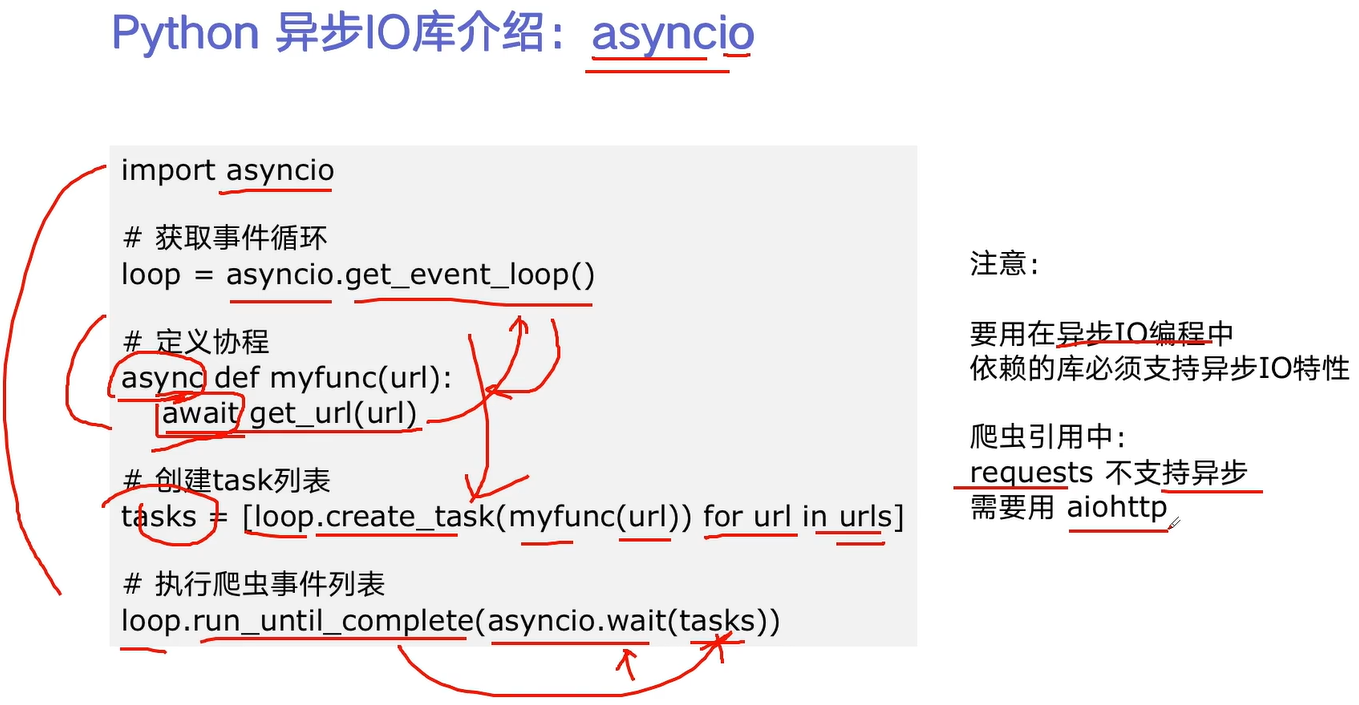

# 代码：
下面就是单线程中，多个协程进行并发执行

In [11]:
import asyncio
import aiohttp
from bs4 import BeautifulSoup

urls = [
    f"https://www.cnblogs.com/sitehome/p/{page}"
    for page in range(1, 50 + 1)
]


def craw(url):
    #print("craw url: ", url)
    r = requests.get(url)
    return r.text


def parse(html):
    # class="post-item-title"
    soup = BeautifulSoup(html, "html.parser")
    links = soup.find_all("a", class_="post-item-title")
    return [(link["href"], link.get_text()) for link in links]



async def async_craw(url):
    print("craw url: ", url)
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as resp:
            result = await resp.text()
            print(f"craw url: {url}, {len(result)}")


loop = asyncio.get_event_loop()

tasks = [
    loop.create_task(async_craw(url))
    for url in urls]

import time

start = time.time()
loop.run_until_complete(asyncio.wait(tasks))
end = time.time()
print("use time seconds: ", end - start)

RuntimeError: This event loop is already running

craw url:  https://www.cnblogs.com/sitehome/p/1
craw url:  https://www.cnblogs.com/sitehome/p/2
craw url:  https://www.cnblogs.com/sitehome/p/3
craw url:  https://www.cnblogs.com/sitehome/p/4
craw url:  https://www.cnblogs.com/sitehome/p/5
craw url:  https://www.cnblogs.com/sitehome/p/6
craw url:  https://www.cnblogs.com/sitehome/p/7
craw url:  https://www.cnblogs.com/sitehome/p/8
craw url:  https://www.cnblogs.com/sitehome/p/9
craw url:  https://www.cnblogs.com/sitehome/p/10
craw url:  https://www.cnblogs.com/sitehome/p/11
craw url:  https://www.cnblogs.com/sitehome/p/12
craw url:  https://www.cnblogs.com/sitehome/p/13
craw url:  https://www.cnblogs.com/sitehome/p/14
craw url:  https://www.cnblogs.com/sitehome/p/15
craw url:  https://www.cnblogs.com/sitehome/p/16
craw url:  https://www.cnblogs.com/sitehome/p/17
craw url:  https://www.cnblogs.com/sitehome/p/18
craw url:  https://www.cnblogs.com/sitehome/p/19
craw url:  https://www.cnblogs.com/sitehome/p/20
craw url:  https://www.cnblog

D:\Anaconda3\lib\ipaddress.py:1144: RuntimeWarning: coroutine 'wait' was never awaited
  raise AddressValueError("Expected 4 octets in %r" % ip_str)


craw url: https://www.cnblogs.com/sitehome/p/8, 69602
craw url: https://www.cnblogs.com/sitehome/p/15, 69289
craw url: https://www.cnblogs.com/sitehome/p/43, 69805
craw url: https://www.cnblogs.com/sitehome/p/1, 69368
craw url: https://www.cnblogs.com/sitehome/p/4, 69389
craw url: https://www.cnblogs.com/sitehome/p/13, 69989
craw url: https://www.cnblogs.com/sitehome/p/21, 69817
craw url: https://www.cnblogs.com/sitehome/p/6, 69530
craw url: https://www.cnblogs.com/sitehome/p/33, 69490
craw url: https://www.cnblogs.com/sitehome/p/2, 69217
craw url: https://www.cnblogs.com/sitehome/p/3, 69959
craw url: https://www.cnblogs.com/sitehome/p/7, 69086
craw url: https://www.cnblogs.com/sitehome/p/18, 69885
craw url: https://www.cnblogs.com/sitehome/p/14, 69175
craw url: https://www.cnblogs.com/sitehome/p/42, 69051
craw url: https://www.cnblogs.com/sitehome/p/5, 69701
craw url: https://www.cnblogs.com/sitehome/p/31, 69511
craw url: https://www.cnblogs.com/sitehome/p/20, 69772
craw url: https://

# 二、在异步IO中使用信号量控制爬虫并发度

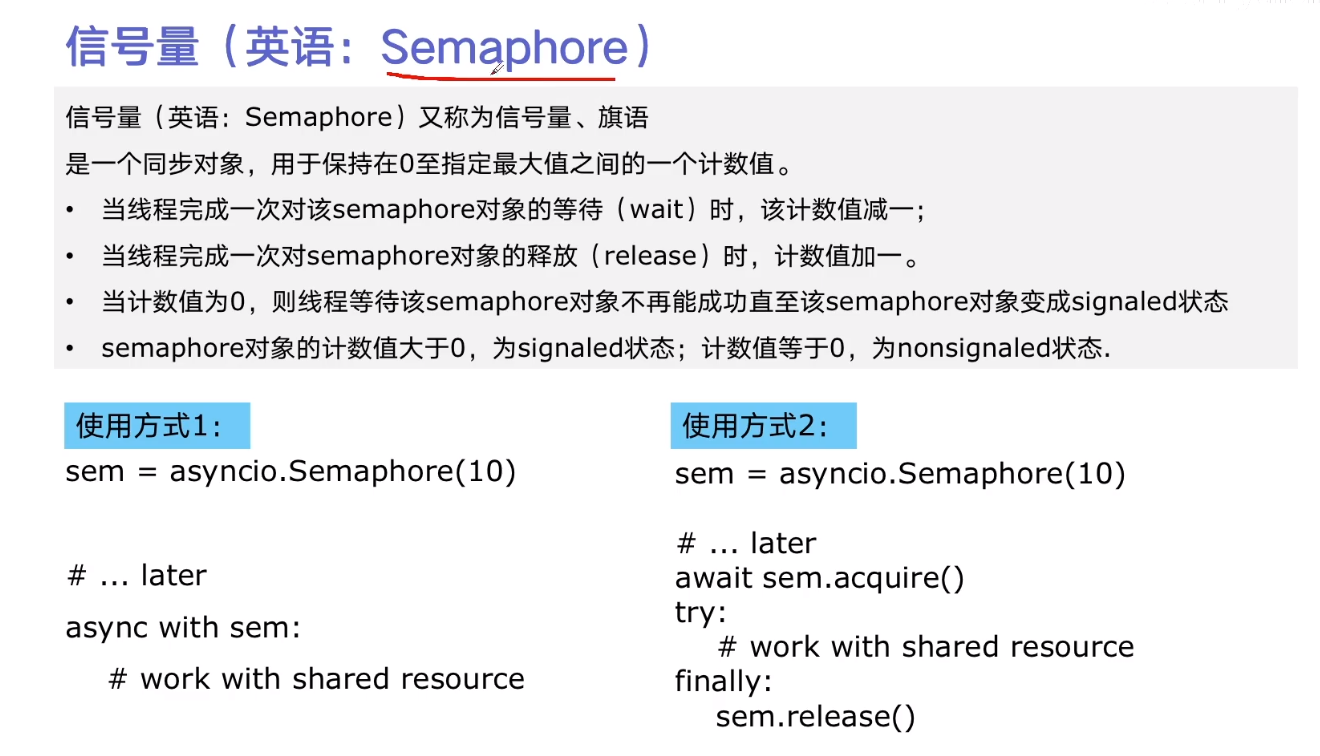

In [13]:
import asyncio
import aiohttp
from bs4 import BeautifulSoup

semaphore = asyncio.Semaphore(10) # 增加一个信号量，控制并发度为10


async def async_craw(url):
    async with semaphore: # 把所有的语句，都写在里面，就可以控制了
        print("craw url: ", url)
        async with aiohttp.ClientSession() as session:
            async with session.get(url) as resp:
                result = await resp.text()
                await asyncio.sleep(5)
                print(f"craw url: {url}, {len(result)}")


loop = asyncio.get_event_loop()

tasks = [
    loop.create_task(async_craw(url))
    for url in urls]

import time

start = time.time()
loop.run_until_complete(asyncio.wait(tasks))
end = time.time()
print("use time seconds: ", end - start)

RuntimeError: This event loop is already running

craw url:  https://www.cnblogs.com/sitehome/p/1
craw url:  https://www.cnblogs.com/sitehome/p/2
craw url:  https://www.cnblogs.com/sitehome/p/3
craw url:  https://www.cnblogs.com/sitehome/p/4
craw url:  https://www.cnblogs.com/sitehome/p/5
craw url:  https://www.cnblogs.com/sitehome/p/6
craw url:  https://www.cnblogs.com/sitehome/p/7
craw url:  https://www.cnblogs.com/sitehome/p/8
craw url:  https://www.cnblogs.com/sitehome/p/9
craw url:  https://www.cnblogs.com/sitehome/p/10
craw url: https://www.cnblogs.com/sitehome/p/4, 69389
craw url: https://www.cnblogs.com/sitehome/p/6, 69484
craw url: https://www.cnblogs.com/sitehome/p/3, 70065
craw url: https://www.cnblogs.com/sitehome/p/2, 69139
craw url: https://www.cnblogs.com/sitehome/p/5, 69753
craw url: https://www.cnblogs.com/sitehome/p/10, 69840
craw url: https://www.cnblogs.com/sitehome/p/9, 69443
craw url:  https://www.cnblogs.com/sitehome/p/11
craw url:  https://www.cnblogs.com/sitehome/p/12
craw url:  https://www.cnblogs.com/sitehom